# Gantt chart

### Import the modules you need

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import datetime as dt
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

### Set up the data

Upload the data by clicking on the "Upload files" button in jupyter lab.

Make sure that this csv file has the following headings:

| Heading | Description |
|:------- |:----------- |
| Task | the labels on the y axis
| Order | the order you'd like the tasks to appear |
| start_months | integer values indicating months from start of the project
| duration_months | integer values indicating duration in months
| color | color |

Then adjust the next line to point to the `.csv` file you just uploaded.

In [ ]:
data_file = '.csv'

We need to know how to label the x axis, in 6 month steps.

Please un-comment the line below that has the _first_ and _sixth_ months of your grant, and adjust the year appropriately.

In [3]:
# first_x_ticks = ('Jan-2020', 'Jul-2020')
# first_x_ticks = ('Feb-2020', 'Aug-2020')
# first_x_ticks = ('Mar-2020', 'Sep-2020')
# first_x_ticks = ('Apr-2020', 'Oct-2020')
# first_x_ticks = ('May-2020', 'Nov-2020')
# first_x_ticks = ('Jun-2020', 'Dec-2020')
# first_x_ticks = ('Jul-2020', 'Jan-2021')
# first_x_ticks = ('Aug-2020', 'Feb-2021')
# first_x_ticks = ('Sep-2020', 'Mar-2021')
# first_x_ticks = ('Oct-2020', 'Apr-2021')
# first_x_ticks = ('Nov-2020', 'May-2021')
first_x_ticks = ('Dec-2019', 'Jun-2020')

## And make the figure

In [4]:
# Read in the CSV file
df = pd.read_csv(data_file)
df['Task'] = df['Task'].astype(str)
df['end_months'] = df['start_months'] + df['duration_months']
df.head()

,Task,Start Date,End Date,Duration (days),Order,start_months,duration_months,color,end_months
0,"Ethics approval: Turing, Manchester and Southa...",01-Dec-19,31-May-20,182.0,1,0.0,6.0,blue,6.0
1,nan,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
2,Research software engineer from pool,01-May-20,30-Apr-23,1094.0,3,6.0,36.0,grey,42.0
3,Engagement and training documentation in The T...,01-May-20,30-Apr-23,1094.0,4,6.0,36.0,green,42.0
4,Donate your notebooks for science campaign,01-May-21,30-Apr-22,364.0,5,18.0,12.0,blue,30.0


In [5]:
# Calculate the x-ticks and x-tick labels

tick_list = np.arange(0, int(max(df['end_months']))+1, 6)

tick_label_list = []

for i, tick in enumerate(tick_list):
    if i%2 == 0:
        month = first_x_ticks[0].split('-')[0]
        year = np.floor(i/2) + int(first_x_ticks[0].split('-')[1])
        tick_label_list += ['{}-{:2.0f}'.format(month, year)]
    else:
        month = first_x_ticks[1].split('-')[0]
        year = np.floor(i/2) + int(first_x_ticks[1].split('-')[1])
        tick_label_list += ['{}-{:2.0f}'.format(month, year)]

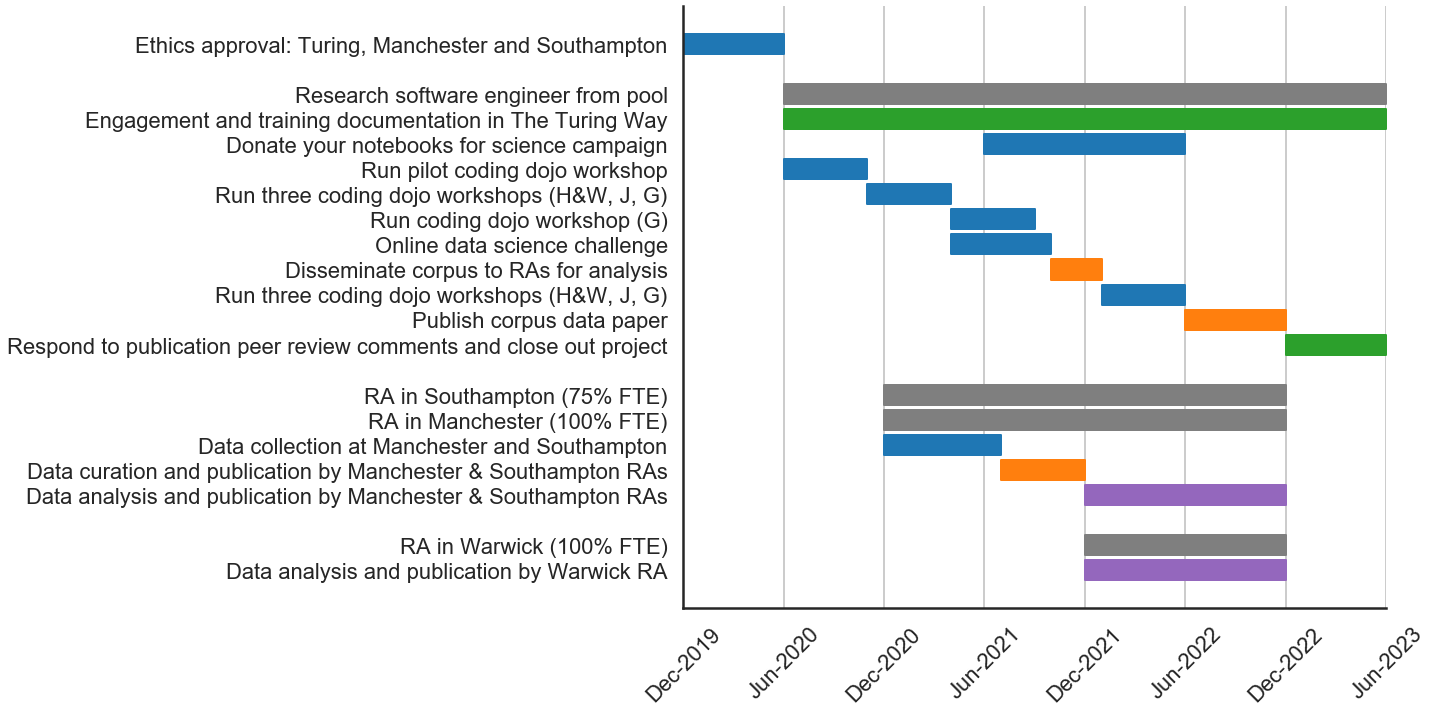

In [6]:
# Declaring a figure "gnt" 
fig, ax = plt.subplots(figsize=(20,10)) 

# Add each row as a broken bar 
for i in range(0, len(df)):    
    mask = df['Order'] == (i+1)
    
    color = df.loc[mask, 'color'].values[0]
    
    if np.any(df.loc[mask, 'start_months'].notnull()):
        
        x_range = (int(df.loc[mask, 'start_months'].values[0]),
                   int(df.loc[mask, 'duration_months'].values[0]))
            
        ax.broken_barh([(x_range)], 
                          ((i-0.4), 0.8),
                          facecolors =('tab:{}'.format(color)),
                          edgecolors =('tab:{}'.format(color)))

# Set x and y min and max
ax.set_xlim([0, df['end_months'].max()])

# Set ticks on x-axis
ax.set_xticks(tick_list)
ax.set_xticklabels(tick_label_list)
plt.xticks(rotation=45)

# Setting ticks on y-axis 

tasks = list(df['Task'].values)
tasks = [ task if task != 'nan' else '' for task in tasks ]

ax.set_yticks(range(0, len(df)))
ax.set_yticklabels(tasks)

# Labelling tickes of y-axis 
#gnt.set_yticklabels(['1', '2', '3']) 

# Setting graph attribute 
ax.grid(axis='x') 

ax.invert_yaxis()

sns.despine()

plt.tight_layout()

fig.savefig("gantt1.png")  # CHANGE THIS IF YOU'D LIKE :)